In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

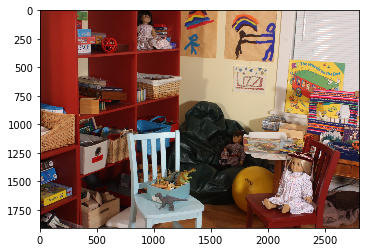

In [12]:
img_left = cv2.imread(r'images/left_image.png')
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_left);

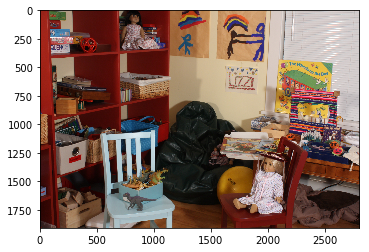

In [13]:
img_right = cv2.imread(r'images/right_image.png')
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_right);

## Matching Patch and Strip

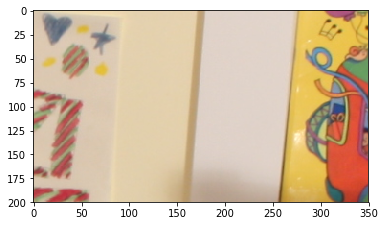

In [308]:
left_patch = img_left[500:700, 1900:2250]
plt.imshow(left_patch);

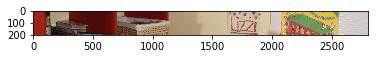

In [295]:
right_strip = img_right[500:700, :]
plt.imshow(right_strip);

### Using Custom Function

In [306]:
def find_best_match(strip, patch, with_figure = True):
    patch_width = patch.shape[1]
    patch_height = patch.shape[0]
    last_multiple = strip.shape[1]//patch_width - 1
    min_diff = float('inf')
    loc = (0, 0)
    last_index = (patch_width*last_multiple)
    for x in range(last_index+1):
        temp_patch = strip[:, x:x+patch_width]
        diff = np.sum((temp_patch - patch)**2)
        if diff < min_diff:
            min_diff = diff
            loc = (x, 0)

    top_left = (loc[0], 0)
    if with_figure:
        bottom_right = (top_left[0]+patch_width, patch_height)
        strip_copy = cv2.rectangle(strip.copy(), top_left, bottom_right, 255, 6)
        plt.figure(figsize=(10, 5))
        # Both need to be uint8,  if both are float64 then divide by 255
        patch_img = np.hstack(
            (patch, np.zeros((patch_height, strip.shape[1] - patch.shape[1], 3), dtype = np.uint8)))
        plt.imshow(np.vstack((patch_img, strip_copy, strip)))
    return top_left

(1841, 0)

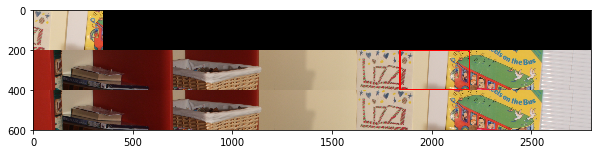

In [309]:
find_best_match(right_strip, left_patch)

### Using Opencv matchTemplate

In [310]:
res = cv2.matchTemplate(right_strip, left_patch, method = cv2.TM_SQDIFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res)

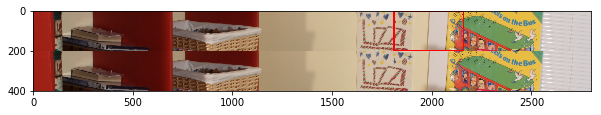

In [311]:
top_left = minLoc
patch_width = left_patch.shape[1]
patch_height = left_patch.shape[0]
bottom_right = (minLoc[0]+patch_width,minLoc[1]+patch_height)
right_copy = right_strip.copy()
right_copy = cv2.rectangle(right_copy, top_left, bottom_right, 255, 6)
plt.figure(figsize = (10, 5))
plt.imshow(np.vstack((right_copy, right_strip)))

## Matching Strip and Strip

In [312]:
def disparity(left_strip, right_strip, block_size = 20):
    total_blocks = right_strip.shape[1]//block_size
    disparity_vector = [0]*total_blocks
    for block in range(total_blocks):
        x_left = block*block_size
        patch_left = left_strip[:, x_left:x_left+block_size]
        x_right = find_best_match(right_strip, patch_left, with_figure=False)
        disparity_vector[block] = abs(x_left - x_right[0])
    
    plt.plot(disparity_vector)
    return disparity_vector

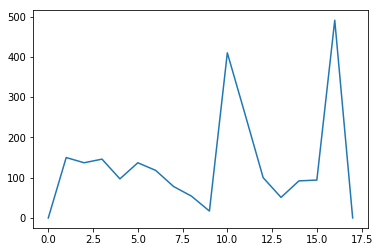

In [313]:
left_strip = img_left[500:700, :]
disparity(left_strip, right_strip, block_size=150);

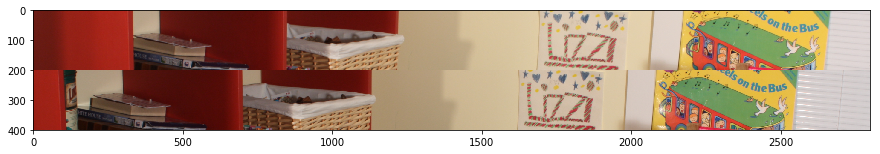

In [314]:
plt.figure(figsize = (15, 8))
plt.imshow(np.vstack((left_strip, right_strip)));

In [316]:
block = 6
block_size=350
l_index = block*block_size
test_patch = left_strip[:, l_index: l_index+block_size]


(2007, 0)

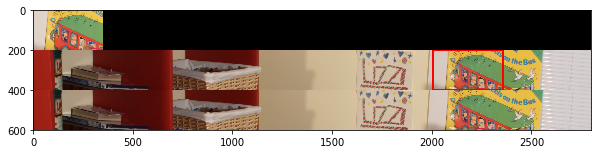

In [317]:
find_best_match(right_strip, test_patch)

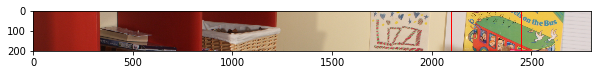

In [318]:
plt.figure(figsize = (10, 8))
plt.imshow(cv2.rectangle(left_strip.copy(), (l_index, 0), (l_index+block_size, left_strip.shape[1]), 255, 6))

In [319]:
l_index - 2007

93